## Fake News Classifier:

- The Problem Statement is from Kaggle along with the dataset.
- The data has information about the title, author and text of the new article along with labelling about whether it is fake news or not.
- Features have been extracted using bag of words(Count Vectorizer) and Tfidf, on both the title and text of the article; the text has given better results and has been shown in this notebook.
- Classification has been attempted using Multinomial NB and PassiveAggressive Classifier, where the latter has performed better and has been showed in this notebook.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('fake-news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [126]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.shape

(20800, 5)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count = CountVectorizer(max_features=5000, ngram_range=(1,3))
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [7]:
import nltk

In [50]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = stopwords.words('english')

In [128]:
corpus = []
for i in range(len(df)):
    text= re.sub('[^a-zA-Z]',' ',str(df.loc[i,'text']))
    text = text.lower().split()
    text = [PorterStemmer().stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    corpus.append(text)    
          

In [129]:
train_mat = count.fit_transform(corpus).toarray()

In [130]:
df_mod = pd.DataFrame(train_mat, columns= count.get_feature_names())
df_mod['label'] = df['label']

In [131]:
from sklearn.model_selection import train_test_split
X = df_mod.drop('label', axis=1)
y = df_mod['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

0.9375
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2597
           1       0.94      0.94      0.94      2603

    accuracy                           0.94      5200
   macro avg       0.94      0.94      0.94      5200
weighted avg       0.94      0.94      0.94      5200



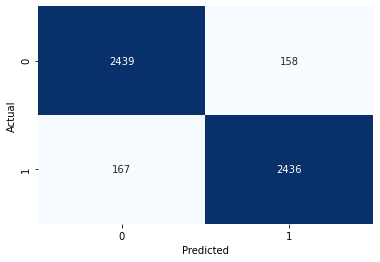

In [138]:
from sklearn.linear_model import PassiveAggressiveClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cl = PassiveAggressiveClassifier()
cl.fit(X_train, y_train)
y_pred= cl.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar= False, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual');



In [133]:
train_tfidf = tfidf.fit_transform(corpus).toarray()

In [134]:
df_tfidf = pd.DataFrame(train_tfidf, columns = tfidf.get_feature_names())
df_tfidf['label'] = df['label']
df_tfidf.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.020664,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.053080,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0.9448076923076923
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2634
           1       0.95      0.94      0.94      2566

    accuracy                           0.94      5200
   macro avg       0.94      0.94      0.94      5200
weighted avg       0.94      0.94      0.94      5200



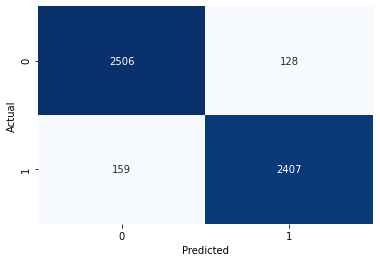

In [135]:
from sklearn.linear_model import PassiveAggressiveClassifier
X_1 = df_tfidf.drop('label', axis=1)
y_1 = df_tfidf['label']
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1)
cl_1 = PassiveAggressiveClassifier()
cl_1.fit(X_1train, y_1train)
y_1pred= cl_1.predict(X_1test)
print(accuracy_score(y_1test, y_1pred))
print(classification_report(y_1test, y_1pred))
sns.heatmap(confusion_matrix(y_1test, y_1pred), annot=True, cbar= False, fmt= 'd', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual');
